# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import warnings
# Suppress all deprecation warnings (not recommended)
warnings.simplefilter("ignore", category=DeprecationWarning)

%matplotlib inline


In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
my_btc_value = requests.get(btc_url).json()
btc_value = my_btc_value['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
my_eth_value = requests.get(eth_url).json()
eth_value = my_eth_value['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31386.00
The current value of your 5.3 ETH is $8419.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp('2023-9-21', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
combined_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
combined_portfolio

AGG                                              \
                           open     high    low  close   volume trade_count   
timestamp                                                                     
2023-09-21 04:00:00+00:00  94.8  94.8059  94.64  94.65  8028921       25112   

                                        SPY                          \
                                vwap   open    high     low   close   
timestamp                                                             
2023-09-21 04:00:00+00:00  94.707747  435.7  435.97  431.23  431.39   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-09-21 04:00:00+00:00  104123943      678363  433.697172

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(combined_portfolio['SPY']['close'])
spy_close_price = float(combined_portfolio['SPY']["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $431.39
Current SPY closing price: $431.39


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21569.50
The current value of your 200 AGG shares is $86278.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(
    [
    my_btc_value + my_eth_value,
    my_agg_value + my_spy_value
    ],
    columns = ['amount'],
    index = ['crypto', 'shares']
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,39805.421
shares,107847.500


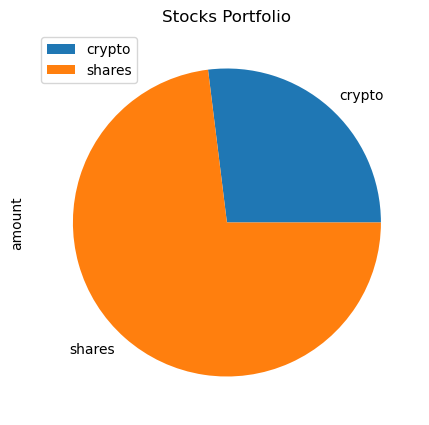

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(figsize=(5,5), y='amount', title='Stocks Portfolio');

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_amount = df_savings['amount'].sum()
total_amount
# Validate saving health
# YOUR CODE HERE!
if total_amount > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_amount < emergency_fund:
    print('You need to start working smarter')
elif total_amount == emergency_fund:
    print('thats odd')
else:
    print('you are not doing so great')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ['AGG','SPY']
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
display(stock_data.head())
display(stock_data.tail())

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2021-04-26 04:00:00+00:00  114.74  114.8015  114.65  114.65  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.37  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.20  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.09  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.33  114.49  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2021-04-26 04:00:00+00:00       13520  114.706244  417.44  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.93  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.81  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.32  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.63  418.54  416.3400   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2021-04-26 04:00:00+00:00  417.61  51824860      295870  417.508245  
2021-04-27 04:00:00+00:00  417.52  50297139      296300  417.481360  
2021-04-28 04:00:00+00:00  417.40  50692781      330049  417.742098  
2021-04-29 04:00:00+00:00  420.06  76965583      443396  418.824046  
2021-04-30 04:00:00+00:00  417.30  84731942      478844  417.651995

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
sum_statistics3 = MCSimulation(
    portfolio_data = stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
sum_statistics3.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
sum_statistics3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\donjm\OneDrive\Desktop\UM BOOTCAMP\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988974,1.004932,0.999387,0.997930,1.008565,1.000067,1.003460,1.001634,1.002515,1.009564,...,0.996670,1.000878,0.995122,0.992439,1.003921,1.005507,0.987562,1.004689,1.007691,0.994710
2,0.983382,1.010809,1.004979,1.005561,0.997970,0.998965,1.006238,0.996301,1.002116,1.016956,...,1.002701,0.988230,0.987389,0.992546,1.003546,1.007605,0.992255,1.009583,1.003243,1.013597
3,0.988258,1.015184,1.001241,0.998765,1.002463,1.007091,1.005720,0.994173,1.012518,1.018811,...,1.001480,0.994795,0.976804,0.996043,1.001806,1.010323,0.985117,1.009585,1.009224,1.028407
4,0.992903,1.020210,0.998603,1.004270,1.001402,0.999396,1.015414,0.995851,1.012251,1.020976,...,0.998839,0.982038,0.970946,1.001568,0.992389,1.020641,0.991968,1.016117,1.016747,1.021021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,51.425161,6.490219,11.258520,16.992192,27.110589,11.425780,23.347471,9.324103,13.066067,8.367475,...,20.538044,10.234657,14.476301,12.630839,16.583672,20.130098,18.559185,89.238726,22.798189,5.844972
7557,51.683803,6.604413,11.274419,16.937087,27.157476,11.408246,23.379563,9.388617,13.050782,8.255288,...,20.691894,10.197518,14.418975,12.749128,16.629222,20.183198,18.680293,89.585347,22.808133,5.814392
7558,52.361492,6.618724,11.272708,16.950463,26.981105,11.339297,23.150903,9.451210,13.010129,8.161038,...,20.668929,10.230835,14.439276,12.747873,16.839431,20.171584,18.556133,89.135394,22.530485,5.793966
7559,52.084126,6.671130,11.326995,16.920830,27.192989,11.349700,23.153379,9.312974,13.057725,8.141855,...,20.753069,10.223551,14.454696,12.707625,16.809540,20.076294,18.601910,88.935397,22.336824,5.798052


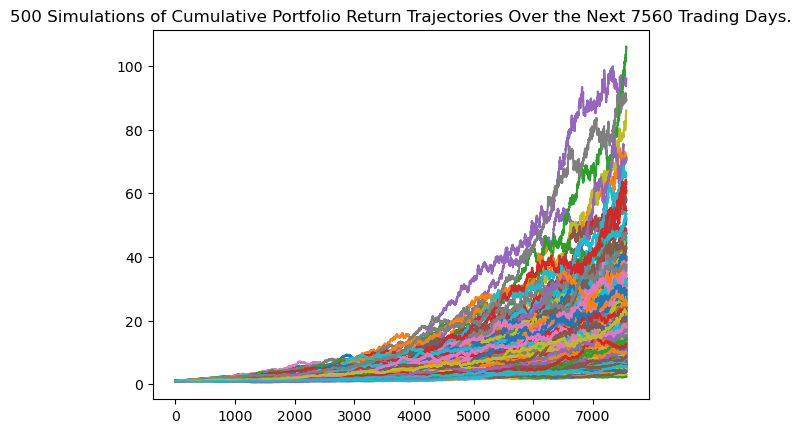

In [19]:
# Plot simulation outcomes
mc_dist_plot = sum_statistics3.plot_simulation()

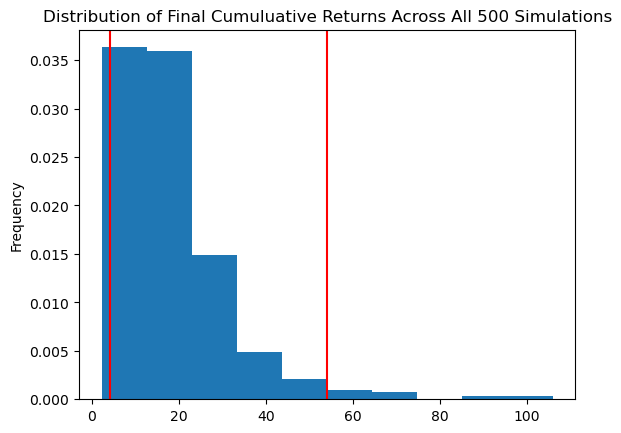

In [20]:
# Plot probability distribution and confidence intervals
mc_dist_prob = sum_statistics3.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_statistics = sum_statistics3.summarize_cumulative_return()

# Print summary statistics
sum_statistics

count           500.000000
mean             18.751462
std              13.413269
min               2.327718
25%              10.380278
50%              15.267574
75%              23.067550
max             105.844028
95% CI Lower      4.270490
95% CI Upper     54.034879
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_statistics[8]*20000,2)
ci_upper = round(sum_statistics[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85409.81 and $1080697.59


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_statistics[8]*30000,2)
ci_upper = round(sum_statistics[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $128114.71 and $1621046.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
sum_statistics3 = MCSimulation(
    portfolio_data = stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
sum_statistics3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\donjm\OneDrive\Desktop\UM BOOTCAMP\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985853,1.008307,1.000244,0.996730,1.005897,0.998979,0.988409,1.005588,0.998500,1.005657,...,0.995156,1.003075,0.995974,1.003710,0.997741,0.996908,1.001167,1.003104,1.001538,0.992381
2,0.984790,1.004986,1.013162,1.000046,1.004648,0.999134,0.994541,1.003812,0.986041,1.011283,...,0.984434,0.990845,1.009100,1.000490,1.001222,1.010898,0.987215,1.014326,0.999393,0.978747
3,0.972210,1.009889,1.012844,1.003101,1.001529,0.999038,0.997722,1.003608,0.986274,0.997988,...,0.986056,0.993394,1.019072,1.020584,0.990673,1.013197,0.986706,1.012088,1.006757,0.985692
4,0.990636,1.010246,1.008632,1.020027,1.007570,1.009974,0.994415,1.004403,1.004937,0.991362,...,0.981804,0.997551,1.010916,1.030872,0.986517,1.027272,0.991568,1.011958,1.012739,0.977558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.181132,2.299276,2.222155,2.205091,1.227339,1.970752,1.317241,1.375898,1.526961,1.931713,...,1.335827,2.009769,1.798460,2.213133,3.359720,1.950466,1.601498,1.385864,2.661378,1.462967
1257,2.169661,2.305227,2.213946,2.167330,1.231736,1.943216,1.321616,1.382374,1.509299,1.934591,...,1.351758,1.995990,1.798388,2.229019,3.370825,1.971421,1.614594,1.374744,2.650858,1.461147
1258,2.152862,2.319215,2.214401,2.158983,1.216292,1.947972,1.318217,1.385465,1.514841,1.920643,...,1.361696,2.003351,1.815359,2.204847,3.371570,1.960643,1.611065,1.386592,2.649952,1.471644
1259,2.151420,2.337467,2.224581,2.186623,1.210194,1.939387,1.318882,1.375569,1.508089,1.941284,...,1.342001,1.981801,1.812310,2.198416,3.353256,1.958418,1.599553,1.391884,2.615750,1.467030


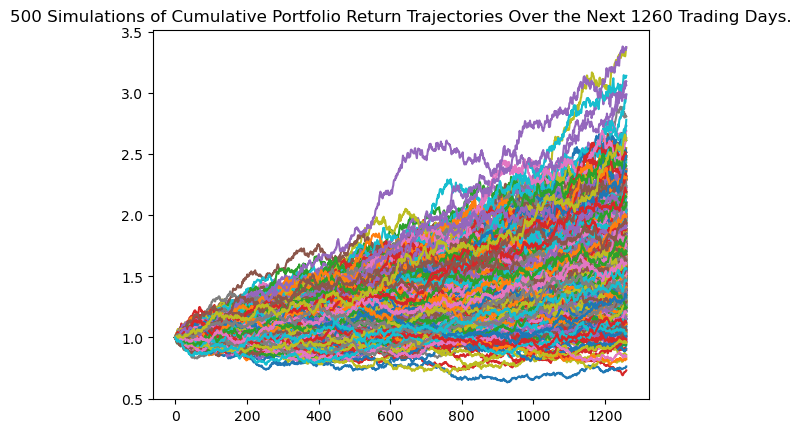

In [26]:
# Plot simulation outcomes
sum_statistics3.plot_simulation();

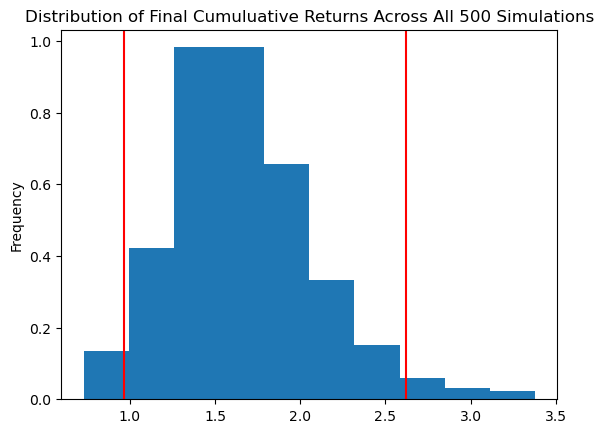

In [27]:
# Plot probability distribution and confidence intervals
mc_dist_prob = sum_statistics3.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results

sum_statistics2 = sum_statistics3.summarize_cumulative_return()
# Print summary statistics
sum_statistics2

count           500.000000
mean              1.662364
std               0.426518
min               0.730661
25%               1.380395
50%               1.595349
75%               1.912966
max               3.377247
95% CI Lower      0.966807
95% CI Upper      2.618890
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment2 = 60000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_statistics2[8]*60000,2)
ci_upper_five = round(sum_statistics2[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $58008.41 and $157133.39


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
sum_statistics3 = MCSimulation(
    portfolio_data = stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
sum_statistics3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\donjm\OneDrive\Desktop\UM BOOTCAMP\MIA-VIRT-FIN-PT-08-2023-U-LOLC\05-APIs\Homework Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000468,1.002047,0.997609,1.000098,1.007754,1.007076,0.991929,1.013287,0.998369,1.014403,...,1.001176,1.002529,1.001073,1.001606,1.009300,1.009629,1.005781,1.002992,1.002293,0.989237
2,0.994640,1.005105,0.999335,1.004640,1.016338,1.018207,0.994261,1.006992,1.005104,1.019197,...,0.994500,1.010483,1.010823,1.002978,1.012562,1.004389,1.005656,1.008498,1.001771,0.993412
3,0.997443,1.002189,0.988911,1.012361,1.012546,1.022164,1.000975,1.004919,1.002295,1.017318,...,0.985750,1.006473,1.020580,1.005105,1.013991,1.007505,1.005544,1.019083,1.003225,0.990849
4,0.998203,1.000195,0.989386,1.023010,0.997389,1.016696,1.001542,1.003606,1.010260,1.017567,...,0.987427,1.026143,1.027841,1.009024,1.009482,1.013823,1.010667,1.020861,1.003681,0.991085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.517609,1.570126,3.644222,4.054224,2.305660,1.712931,2.333124,2.482185,2.826702,2.208674,...,2.385119,2.208928,1.396311,1.660150,2.973745,1.389637,1.673192,2.480980,3.646978,1.025628
2517,4.523506,1.579460,3.623432,4.077043,2.290695,1.696152,2.318212,2.502288,2.813855,2.216985,...,2.433335,2.215310,1.392086,1.635521,2.972432,1.388601,1.664248,2.471895,3.615071,1.025725
2518,4.557434,1.590729,3.621538,4.062940,2.302244,1.690621,2.299572,2.489136,2.817343,2.207440,...,2.445108,2.195768,1.398859,1.625794,2.968692,1.395385,1.688704,2.482293,3.631914,1.044659
2519,4.581933,1.579157,3.654139,4.048694,2.314774,1.689915,2.308118,2.505466,2.834620,2.202706,...,2.406333,2.194240,1.399593,1.628448,2.989945,1.397484,1.669389,2.480332,3.595510,1.046889


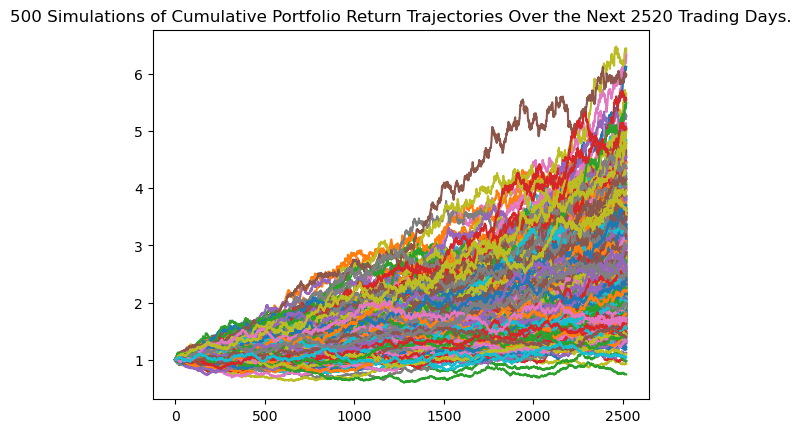

In [32]:
# Plot simulation outcomes
sum_statistics3.plot_simulation();

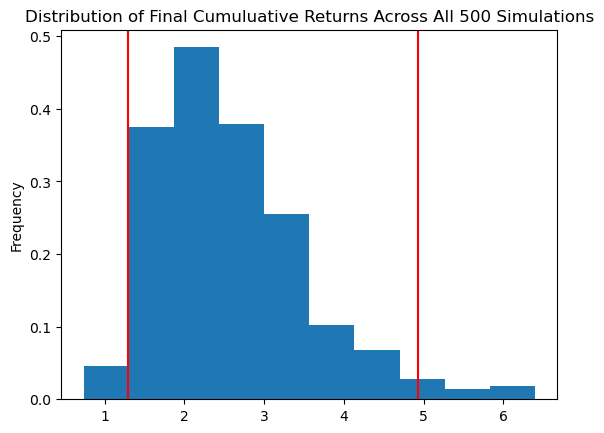

In [33]:
# Plot probability distribution and confidence intervals
sum_statistics3.plot_distribution();

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_statistics3 = sum_statistics3.summarize_cumulative_return()

# Print summary statistics
sum_statistics3

count           500.000000
mean              2.574344
std               0.943366
min               0.741463
25%               1.922192
50%               2.411904
75%               3.069649
max               6.394797
95% CI Lower      1.299654
95% CI Upper      4.926193
Name: 2520, dtype: float64

In [35]:
# Set initial investment
initial_investment3 = 60000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_statistics3[8]*60000,2)
ci_upper_ten = round(sum_statistics3[8]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $77979.23 and $77979.23
